Google Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Installation of TensorFlow
# Below code is marked as comment. This is required if tensor flow is not installed


#!pip install tensorflow==2.3.0 

In [3]:
import tensorflow as tf
print(tf.__version__)

2.3.0


1. Importing Library, DataSet 

In [4]:
# Import necessary libraries.

import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
# Importing DataSet

X = np.load('/content/drive/My Drive/Colab Notebooks/Plant Seedlings Image Classification/images.npy')         # Importing Images

y= pd.read_csv('/content/drive/My Drive/Colab Notebooks/Plant Seedlings Image Classification/Labels.csv')      # Importing Labels


In [6]:
# Shape of Image 
X.shape

# 128 x 128 pixel 
# Its color Image as value is 3
# Length of DataSet is 4750

(4750, 128, 128, 3)

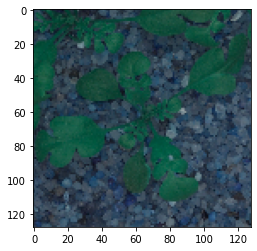

In [7]:
# Visualization of Images in DataSet

import matplotlib.pyplot as plt
i=1200
img = X[i]
plt.imshow(img, cmap='gray')

In [8]:
# Type of DataSet
type(X)

numpy.ndarray

2. Data Pre-Processing

Normalization

- We perform a grayscale normalization to reduce the effect of illumination's differences.


In [9]:
# Normalize the data
# This is one way to Normalize . However Normalization is done down the line  
#X= X.astype('float32') / 255.0

Gaussian Blurring

In [10]:
X_Gaus= np.copy(X)

In [11]:
X_Gaus.shape

(4750, 128, 128, 3)

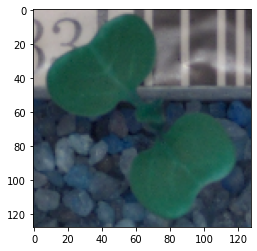

In [12]:
# Visualizing Image Before Gaussian Blurring
i=2400
img1 = X[i]
plt.imshow(img1, cmap='gray')

In [13]:
# Gaussian Blurring
import cv2
from google.colab.patches import cv2_imshow
for idx, img in enumerate(X_Gaus):
  X_Gaus[idx] = cv2.GaussianBlur(img, (5, 5), 0)

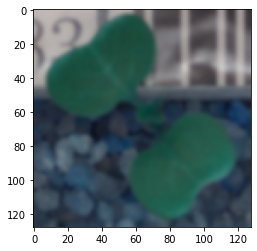

In [14]:
# Visualizing Image after Gaussian Blurring
i=2400
img1 = X_Gaus[i]
plt.imshow(img1, cmap='gray')

In [15]:
# Printing Labels
y

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill
...,...
4745,Loose Silky-bent
4746,Loose Silky-bent
4747,Loose Silky-bent
4748,Loose Silky-bent


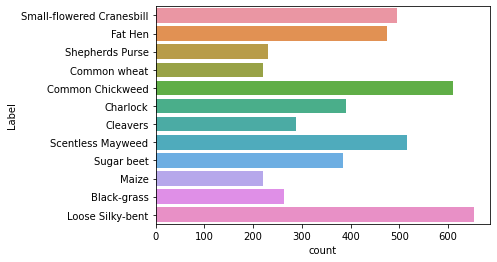

In [16]:
# Plotting Count of Weeds
import seaborn as sns
import pandas as pd
df= pd.DataFrame(data=y)
sns.countplot(y="Label",data=df)

In [17]:
# Number of Unique Labels 
df['Label'].nunique()

12

In [18]:
y.dtypes

Label    object
dtype: object

In [19]:
# Convert labels to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(y)


Print the label for y_train[0]


In [20]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [21]:
# Split data into test and train to build the model.
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [22]:
# Split data into test and train to build the model.
from sklearn.model_selection import train_test_split
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.5, random_state=5)

In [23]:
# Shape of Label Variable
y.shape

(4750, 12)

In [24]:
# Print the shape of dataset.
print('x_train shape:', X_train.shape)
print('x_test shape:', x_test.shape)
print('x_Validation shape:', x_val.shape)


print('train samples',X_train.shape[0])
print('test samples', x_test.shape[0])
print('validation samples', x_val.shape[0])

x_train shape: (3325, 128, 128, 3)
x_test shape: (712, 128, 128, 3)
x_Validation shape: (713, 128, 128, 3)
train samples 3325
test samples 712
validation samples 713


Shape of Data is compatible. 
Its is 128 x 128

In [25]:

from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

Create the Model:
- Convolutional input layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Convolutional layer, 32 feature maps with a size of 5×5 and a rectifier activation function.
- Max Pool layer with size 2×2.
- Dropout layer at 20%.

--------------------------------------------
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Convolutional layer, 64 feature maps with a size of 3×3 and a rectifier activation function.
- Max Pool layer with size 2×2.
- Dropout layer at 30%.

-------------------------------------------


- GlobalMaxPooling2D layer.
- Fully connected layer with 256 units and a rectifier activation function.
- Dropout layer at 50%.
- Fully connected output layer with 12 units and a softmax activation function.

In [26]:
# Set the CNN model 

batch_size = None

model = models.Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', batch_input_shape = (batch_size,128, 128, 3)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))

model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [27]:
# initiate Adam optimizer
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

opt = optimizers.Adam(learning_rate=0.002, beta_1=0.9, beta_2=0.999, epsilon=1e-08)



In [28]:
# Let's train the model 
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


In [29]:
# Set the batch size, number of epochs.
batch_size = 32
epochs = 80

In [30]:
#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.0001' for more than 10 continous epochs
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.00001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto',
                                                           period=1)

Epoch 1/80
104/104 [==============================] - 6s 57ms/step - loss: 2.8161 - accuracy: 0.1907 - val_loss: 2.2537 - val_accuracy: 0.3001
Epoch 2/80
104/104 [==============================] - 5s 49ms/step - loss: 2.0274 - accuracy: 0.2854 - val_loss: 2.0826 - val_accuracy: 0.3534
Epoch 3/80
104/104 [==============================] - 5s 49ms/step - loss: 1.8885 - accuracy: 0.3311 - val_loss: 1.9828 - val_accuracy: 0.3001
Epoch 4/80
104/104 [==============================] - 5s 50ms/step - loss: 1.7799 - accuracy: 0.3591 - val_loss: 1.9464 - val_accuracy: 0.3240
Epoch 5/80
104/104 [==============================] - 5s 50ms/step - loss: 1.7344 - accuracy: 0.3741 - val_loss: 1.6674 - val_accuracy: 0.4460
Epoch 6/80
104/104 [==============================] - 5s 50ms/step - loss: 1.6074 - accuracy: 0.4198 - val_loss: 1.7241 - val_accuracy: 0.3745
Epoch 7/80
104/104 [==============================] - 5s 50ms/step - loss: 1.5475 - accuracy: 0.4361 - val_loss: 1.7204 - val_accuracy: 0.3717

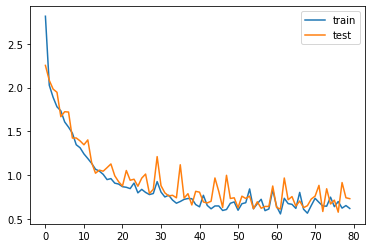

In [31]:
# Fitting of Model

history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_val, y_val),
                    shuffle=True,
                    verbose=1)
                    #,callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

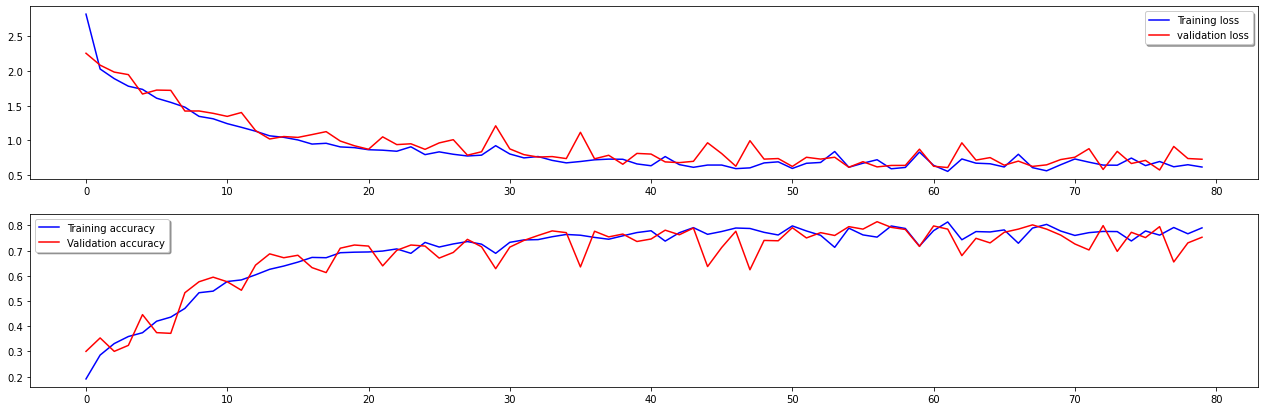

In [32]:
# Plotting (Training Loss & Validation Loss),(Training Accuracy and Validation Accuracy)
fig, ax = plt.subplots(2,1 , figsize=(22,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [33]:
# Evaluation of Model
score = model.evaluate(x_test, y_test, verbose=0, batch_size = None)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7377694845199585
Test accuracy: 0.757022500038147


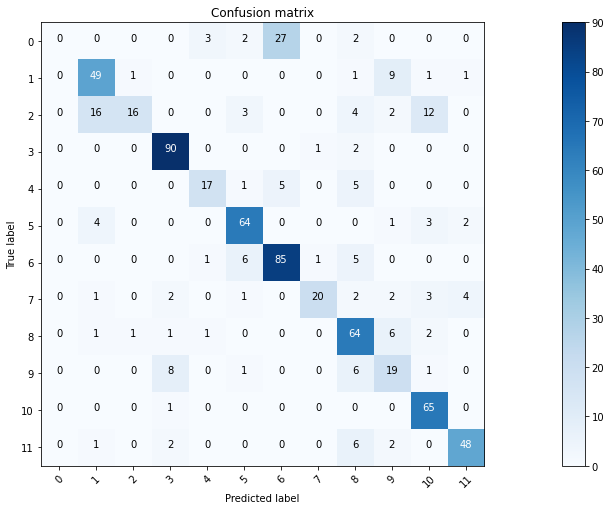

In [34]:
from sklearn.metrics import confusion_matrix
import itertools
plt.subplots(figsize=(22,7)) #set the size of the plot 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(12))


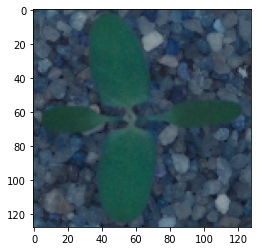

In [35]:
# Visualizing Predictions for x_test[2]
i=2
img1 = x_test[i]
plt.imshow(img1, cmap='gray')

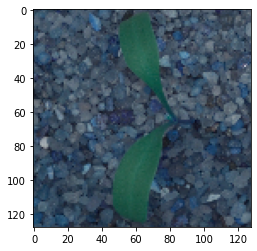

In [36]:
# Visualizing Predictions for x_test[3]
i=3
img1 = x_test[i]
plt.imshow(img1, cmap='gray')

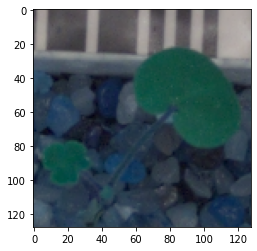

In [37]:
# Visualizing Predictions for x_test[33]
i=33
img1 = x_test[i]
plt.imshow(img1, cmap='gray')

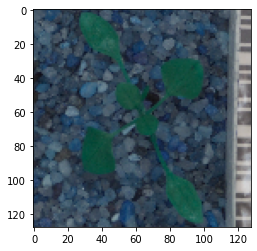

In [38]:
# Visualizing Predictions for x_test[36]
i=36
img1 = x_test[i]
plt.imshow(img1, cmap='gray')

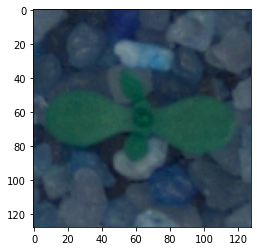

In [39]:
# Visualizing Predictions for x_test[59]
i=59
img1 = x_test[i]
plt.imshow(img1, cmap='gray')